# 对Wine Reviews数据集使用Aprior算法做关联规则挖掘，评价指标有Lift、Leverage、Conviction，仓库地址：https://github.com/Graceqi/Aprior_Wine

## 一、数据预处理，转换成适合进行关联规则挖掘的形式

导入python包

In [1]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd  
import matplotlib as mpl
# we need to install mlxtend on anaconda prompt by typing 'pip install mlxtend'
from mlxtend.frequent_patterns import apriori  
from mlxtend.frequent_patterns import association_rules

读取wine review数据集，并删除缺失值所在行

In [2]:
wine_data = pd.read_csv("D:\\数据挖掘课件视频\\数据集\\2\\wine-reviews\\winemag-data-130k-v2.csv",index_col=0) 
# print(store_data)
wine_data=wine_data.dropna()
wine_list = wine_data.columns.values.tolist()
print(wine_list)

['country', 'description', 'designation', 'points', 'price', 'province', 'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title', 'variety', 'winery']


In [3]:
Items={}
for item in wine_data['winery']:
    if item in Items:
        Items[item]= Items[item] + 1
    else:
        Items[item]=1
        
keys=[]
vals=[]
for i,k in Items.items():
    if k>50:
        keys.append(i)
        vals.append(k)
        


可视化

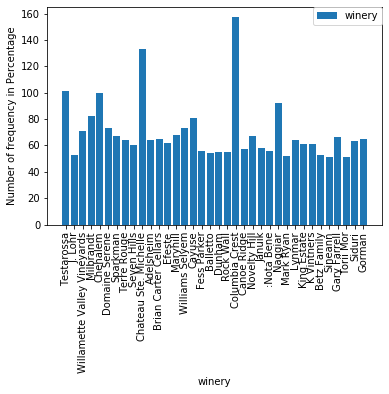

In [4]:
plt.bar(keys, vals, label="winery")
plt.rcParams["figure.figsize"] = [20,10]
plt.ylabel ('Number of frequency in Percentage')
plt.xlabel ('winery')
plt.xticks(list(keys), rotation=90)
plt.legend (bbox_to_anchor=(1, 1), loc="best", borderaxespad=0.)

plt.show()

该分析需要one hot编码，添加Quantity列存放one hot编码。

In [5]:
wine_data['Quantity']= 1

In [6]:
wine_data.head(7)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,Quantity
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,1
10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature,1
23,US,This wine from the Geneseo district offers aro...,Signature Selection,87,22.0,California,Paso Robles,Central Coast,Matt Kettmann,@mattkettmann,Bianchi 2011 Signature Selection Merlot (Paso ...,Merlot,Bianchi,1
25,US,Oak and earth intermingle around robust aromas...,King Ridge Vineyard,87,69.0,California,Sonoma Coast,Sonoma,Virginie Boone,@vboone,Castello di Amorosa 2011 King Ridge Vineyard P...,Pinot Noir,Castello di Amorosa,1
35,US,As with many of the Erath 2010 vineyard design...,Hyland,86,50.0,Oregon,McMinnville,Willamette Valley,Paul Gregutt,@paulgwine,Erath 2010 Hyland Pinot Noir (McMinnville),Pinot Noir,Erath,1
60,US,"Syrupy and dense, this wine is jammy in plum a...",Estate,86,100.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Okapi 2013 Estate Cabernet Sauvignon (Napa Val...,Cabernet Sauvignon,Okapi,1
62,US,"The aromas are brooding, with notes of barrel ...",Alder Ridge Vineyard,86,25.0,Washington,Columbia Valley (WA),Columbia Valley,Sean P. Sullivan,@wawinereport,Ram 2014 Alder Ridge Vineyard Cabernet Franc (...,Cabernet Franc,Ram,1


将两列数据分别作为行索引和列索引

In [7]:
basket = wine_data.groupby(['region_1','winery'])['Quantity'].sum().unstack().fillna(0)
basket.head()


winery,100 Percent Wine,1000 Stories,12C Wines,14 Hands,18401 Cellars,29 & Oak Wines,2Hawk,2Plank,3 Badge Beverage,3 Horse Ranch Vineyards,...,flipflop,iNapa Wine,j.brix,kukkula,pb,un4seen,Écluse,Élevée Winegrowers,Órale,àMaurice
region_1,,,,,,,,,,,,,,,,,,,,,
Adelaida District,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0
Alexander Valley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Alta Mesa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Amador County,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ancient Lakes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
basket2 = wine_data.groupby(['winery','region_1'])['Quantity'].sum().unstack().fillna(0)
basket2.head()

region_1,Adelaida District,Alexander Valley,Alta Mesa,Amador County,Ancient Lakes,Applegate Valley,Arroyo Grande Valley,Arroyo Seco,Atlas Peak,Ballard Canyon,...,Walla Walla Valley (OR),Walla Walla Valley (WA),Washington,Willamette Valley,Yakima Valley,Yamhill County,Yolo County,York Mountain,Yorkville Highlands,Yountville
winery,,,,,,,,,,,,,,,,,,,,,
100 Percent Wine,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000 Stories,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12C Wines,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14 Hands,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18401 Cellars,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


applymap()让encode_units函数作用于basket每一个元素的操作。

对country和province的关联规则进行挖掘

In [9]:
basket3 = wine_data.groupby(['country','province'])['Quantity'].sum().unstack().fillna(0)
basket3.head()

province,California,New York,Oregon,Washington
country,,,,
US,12900,153,3489,5845


In [10]:
basket4 = wine_data.groupby(['province','country'])['Quantity'].sum().unstack().fillna(0)
basket4.head()

country,US
province,
California,12900
New York,153
Oregon,3489
Washington,5845


In [11]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)
basket_sets2 = basket2.applymap(encode_units)
basket_sets3 = basket3.applymap(encode_units)
basket_sets4 = basket4.applymap(encode_units)

## 二、使用Aprior算法做关联规则挖掘,评价指标有Lift、Leverage、Conviction

使用Aprior算法计算频繁项集，支持度设为0.3

In [12]:
frequent_itemsets = apriori(basket_sets,min_support=0.03,  use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.035088,(Adelsheim)
1,0.035088,(Almquist)
2,0.035088,(Alpha Omega)
3,0.035088,(Anaba)
4,0.040936,(Artesa)
...,...,...
88,0.035088,"(St. Francis, Ravenswood)"
89,0.046784,"(Rock Wall, Rosenblum)"
90,0.035088,"(St. Francis, Rock Wall)"
91,0.035088,"(Ravenswood, Rock Wall, Rosenblum)"


In [13]:
frequent_itemsets2 = apriori(basket_sets2,min_support=0.03,  use_colnames=True)
frequent_itemsets2

,support,itemsets
0,0.084558,(California)
1,0.034755,(Carneros)
2,0.117162,(Columbia Valley (WA))
3,0.030455,(Dry Creek Valley)
4,0.043712,(Lodi)
5,0.113579,(Napa Valley)
6,0.059835,(Paso Robles)
7,0.034396,(Red Mountain)
8,0.094948,(Russian River Valley)
9,0.036546,(Santa Barbara County)


In [14]:
frequent_itemsets3 = apriori(basket_sets3,min_support=0.03,  use_colnames=True)
frequent_itemsets3

,support,itemsets
0,1.0,(California)
1,1.0,(New York)
2,1.0,(Oregon)
3,1.0,(Washington)
4,1.0,"(California, New York)"
5,1.0,"(California, Oregon)"
6,1.0,"(Washington, California)"
7,1.0,"(New York, Oregon)"
8,1.0,"(Washington, New York)"
9,1.0,"(Washington, Oregon)"


In [15]:
frequent_itemsets4 = apriori(basket_sets4,min_support=0.03,  use_colnames=True)
frequent_itemsets4

,support,itemsets
0,1.0,(US)


计算关联规则，置信度大于0.7

In [16]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)
rules2 = association_rules(frequent_itemsets2, metric="confidence", min_threshold=0.6)
rules3 = association_rules(frequent_itemsets3, metric="confidence", min_threshold=0.6)
rules4 = association_rules(frequent_itemsets4, metric="confidence", min_threshold=0.6)

评价指标lift:lift(A,B)=P(A,B)/(P(A)P(B))，如果lift(A,B)>1表示A、B呈正相关，lift(A,B)<1表示A、B呈负相关，lift(A,B)=1表示A、B不相关（独立）
评价指标Leverage:Leverage(A,B)=P(A,B)-P(A)P(B),Leverage=0时A和B独立，Leverage越大A和B的关系越密切
评价指标Conviction:Conviction(A,B)=P(A)P(!B)/P(A,!B) （!B表示B没有发生） Conviction也是用来衡量A和B的独立性。从它和lift的关系（对B取反，代入Lift公式后求倒数）可以看出，这个值越大, A、B越关联。

In [17]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Kenwood),(Buena Vista),0.040936,0.058480,0.035088,0.857143,14.657143,0.032694,6.590643
1,(Buena Vista),(Kenwood),0.058480,0.040936,0.035088,0.600000,14.657143,0.032694,2.397661
2,(Ravenswood),(Buena Vista),0.052632,0.058480,0.035088,0.666667,11.400000,0.032010,2.824561
3,(Buena Vista),(Ravenswood),0.058480,0.052632,0.035088,0.600000,11.400000,0.032010,2.368421
4,(Bunnell),(Hogue),0.035088,0.035088,0.035088,1.000000,28.500000,0.033857,inf
5,(Hogue),(Bunnell),0.035088,0.035088,0.035088,1.000000,28.500000,0.033857,inf
6,(Kenwood),(Ravenswood),0.040936,0.052632,0.035088,0.857143,16.285714,0.032933,6.631579
7,(Ravenswood),(Kenwood),0.052632,0.040936,0.035088,0.666667,16.285714,0.032933,2.877193
8,(Landmark),(Walt),0.052632,0.035088,0.035088,0.666667,19.000000,0.033241,2.894737
9,(Walt),(Landmark),0.035088,0.052632,0.035088,1.000000,19.000000,0.033241,inf


winery->region_1中，相关的规则较多，有26条。

In [18]:
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Yakima Valley),(Columbia Valley (WA)),0.053386,0.117162,0.033321,0.624161,5.32732,0.027067,2.348979


region_1->winery只有一条相关规则可以达到置信度大于0.6的标准。相关性不大。

In [19]:
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(California),(New York),1.0,1.0,1.0,1.0,1.0,0.0,inf
1,(New York),(California),1.0,1.0,1.0,1.0,1.0,0.0,inf
2,(California),(Oregon),1.0,1.0,1.0,1.0,1.0,0.0,inf
3,(Oregon),(California),1.0,1.0,1.0,1.0,1.0,0.0,inf
4,(Washington),(California),1.0,1.0,1.0,1.0,1.0,0.0,inf
5,(California),(Washington),1.0,1.0,1.0,1.0,1.0,0.0,inf
6,(New York),(Oregon),1.0,1.0,1.0,1.0,1.0,0.0,inf
7,(Oregon),(New York),1.0,1.0,1.0,1.0,1.0,0.0,inf
8,(Washington),(New York),1.0,1.0,1.0,1.0,1.0,0.0,inf
9,(New York),(Washington),1.0,1.0,1.0,1.0,1.0,0.0,inf


province->country有49条规则，但是支持度、置信度、lift指标均为1，且leverage均为0，说明这两个列就是确定的关系。

In [20]:
rules4

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


country->province没有可挖掘规则，说明来自统一国家的省份比较分散

## 三、关联规则可视化

In [21]:
def my_x(a,b):
    return (f"{a}->{b}")

rules['x']=rules.apply(lambda row:my_x(row['antecedents'],row['consequents']),axis=1)
rules2['x']=rules2.apply(lambda row:my_x(row['antecedents'],row['consequents']),axis=1)
rules3['x']=rules3.apply(lambda row:my_x(row['antecedents'],row['consequents']),axis=1)


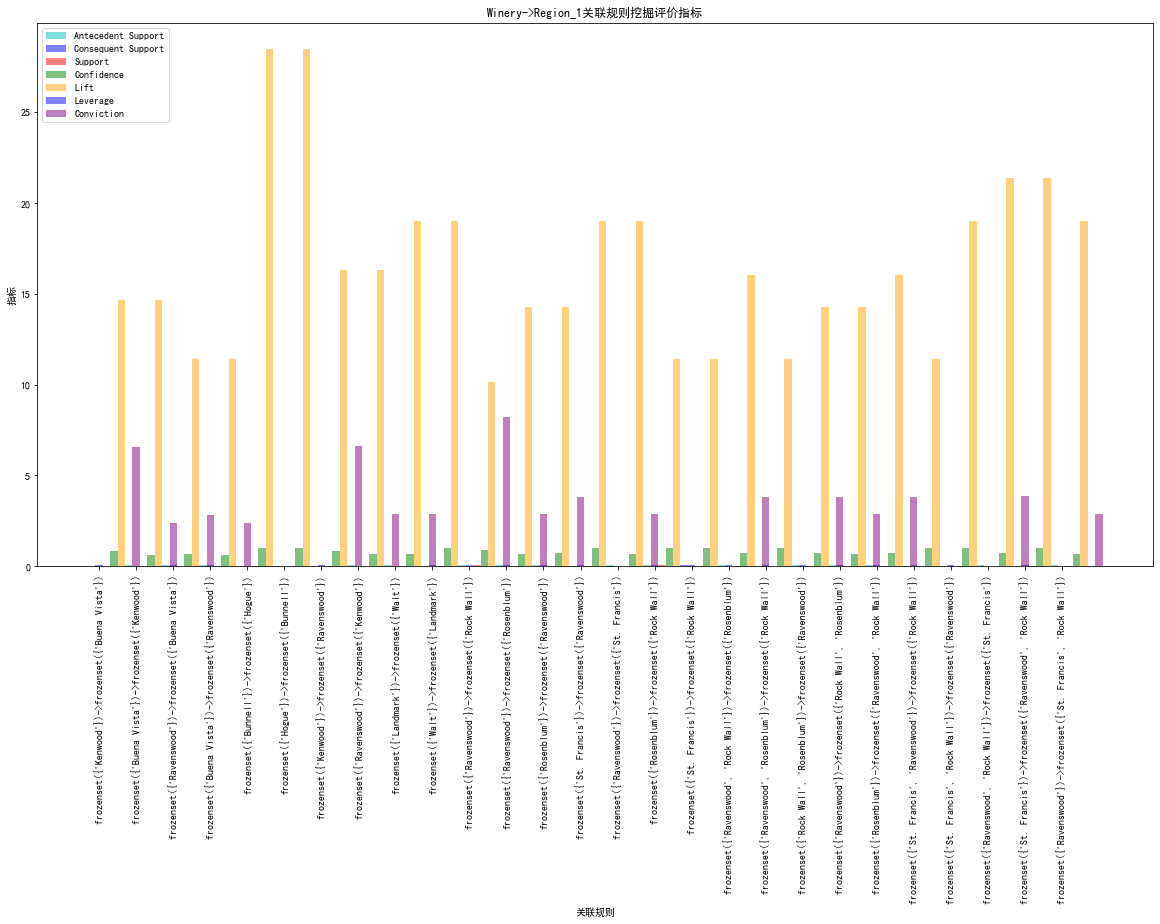

In [22]:
mpl.rcParams["font.sans-serif"] = ["SimHei"]
mpl.rcParams["axes.unicode_minus"] = False

x = np.arange(rules.shape[0])
y = list(rules['antecedent support'].values)
y1 =list(rules['consequent support'].values)
y2 = list(rules['support'].values)
y3 = list(rules['confidence'].values)
y4 =list(rules['lift'].values)
y5 = list(rules['leverage'].values)
y6 = list(rules['conviction'].values)

bar_width = 0.2
tick_label = rules['x']

plt.bar(x, y, bar_width, align="center", color="c", label="Antecedent Support", alpha=0.5)
plt.bar(x+bar_width, y1, bar_width, color="b", align="center", label="Consequent Support", alpha=0.5)
plt.bar(x+bar_width*2, y2, bar_width, color="red", align="center", label="Support", alpha=0.5)
plt.bar(x+bar_width*3, y3, bar_width, color="green", align="center", label="Confidence", alpha=0.5)
plt.bar(x+bar_width*4, y4, bar_width, color="orange", align="center", label="Lift", alpha=0.5)
plt.bar(x+bar_width*5, y5, bar_width, color="blue", align="center", label="Leverage", alpha=0.5)
plt.bar(x+bar_width*6, y6, bar_width, color="purple", align="center", label="Conviction", alpha=0.5)

plt.title('Winery->Region_1关联规则挖掘评价指标')
plt.xlabel("关联规则")
plt.ylabel("指标")

plt.xticks(x+bar_width, tick_label)
plt.xticks(rotation=90)
plt.legend()

plt.show()


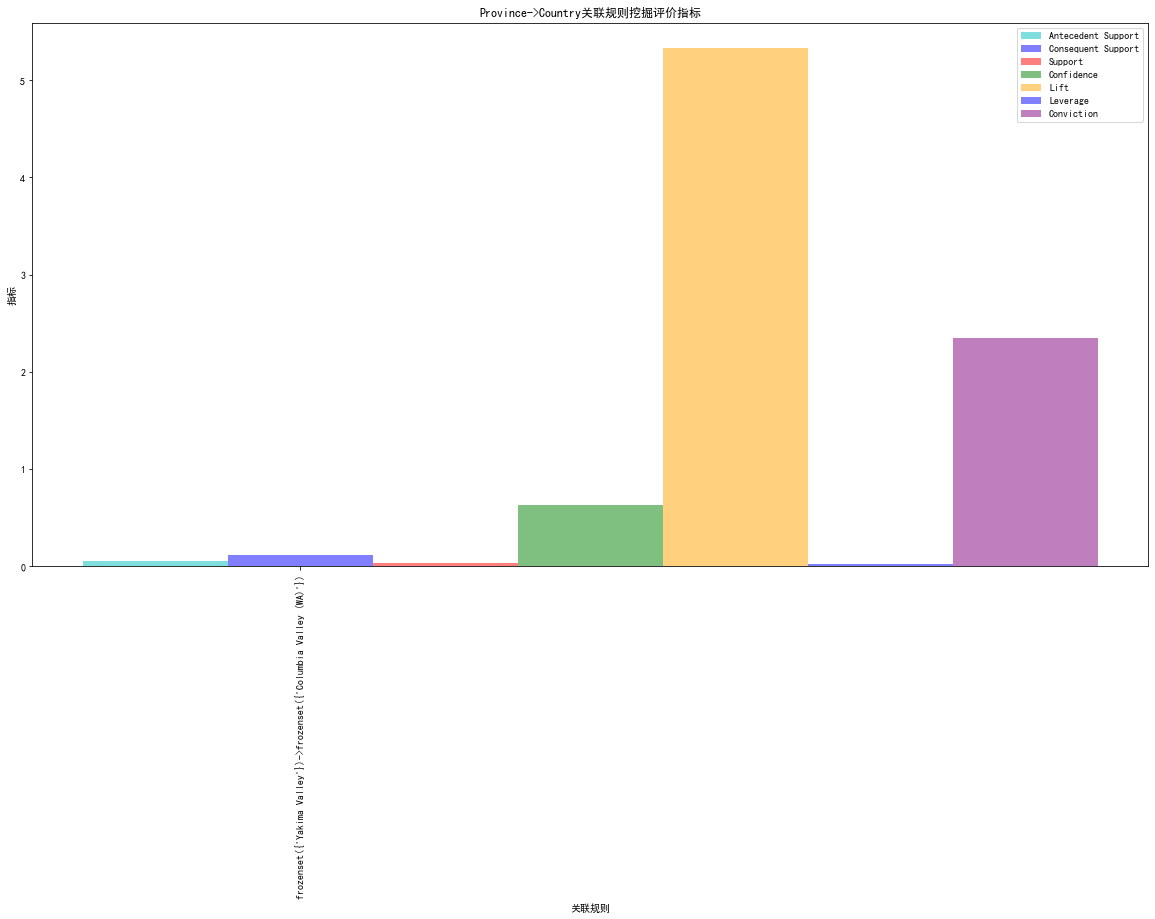

In [23]:
mpl.rcParams["font.sans-serif"] = ["SimHei"]
mpl.rcParams["axes.unicode_minus"] = False

x = np.arange(rules2.shape[0])
y = list(rules2['antecedent support'].values)
y1 =list(rules2['consequent support'].values)
y2 = list(rules2['support'].values)
y3 = list(rules2['confidence'].values)
y4 =list(rules2['lift'].values)
y5 = list(rules2['leverage'].values)
y6 = list(rules2['conviction'].values)

bar_width = 0.2
tick_label = rules2['x']

plt.bar(x, y, bar_width, align="center", color="c", label="Antecedent Support", alpha=0.5)
plt.bar(x+bar_width, y1, bar_width, color="b", align="center", label="Consequent Support", alpha=0.5)
plt.bar(x+bar_width*2, y2, bar_width, color="red", align="center", label="Support", alpha=0.5)
plt.bar(x+bar_width*3, y3, bar_width, color="green", align="center", label="Confidence", alpha=0.5)
plt.bar(x+bar_width*4, y4, bar_width, color="orange", align="center", label="Lift", alpha=0.5)
plt.bar(x+bar_width*5, y5, bar_width, color="blue", align="center", label="Leverage", alpha=0.5)
plt.bar(x+bar_width*6, y6, bar_width, color="purple", align="center", label="Conviction", alpha=0.5)

plt.title('Province->Country关联规则挖掘评价指标')
plt.xlabel("关联规则")
plt.ylabel("指标")

plt.xticks(x+bar_width, tick_label)
plt.xticks(rotation=90)
plt.legend()

plt.show()


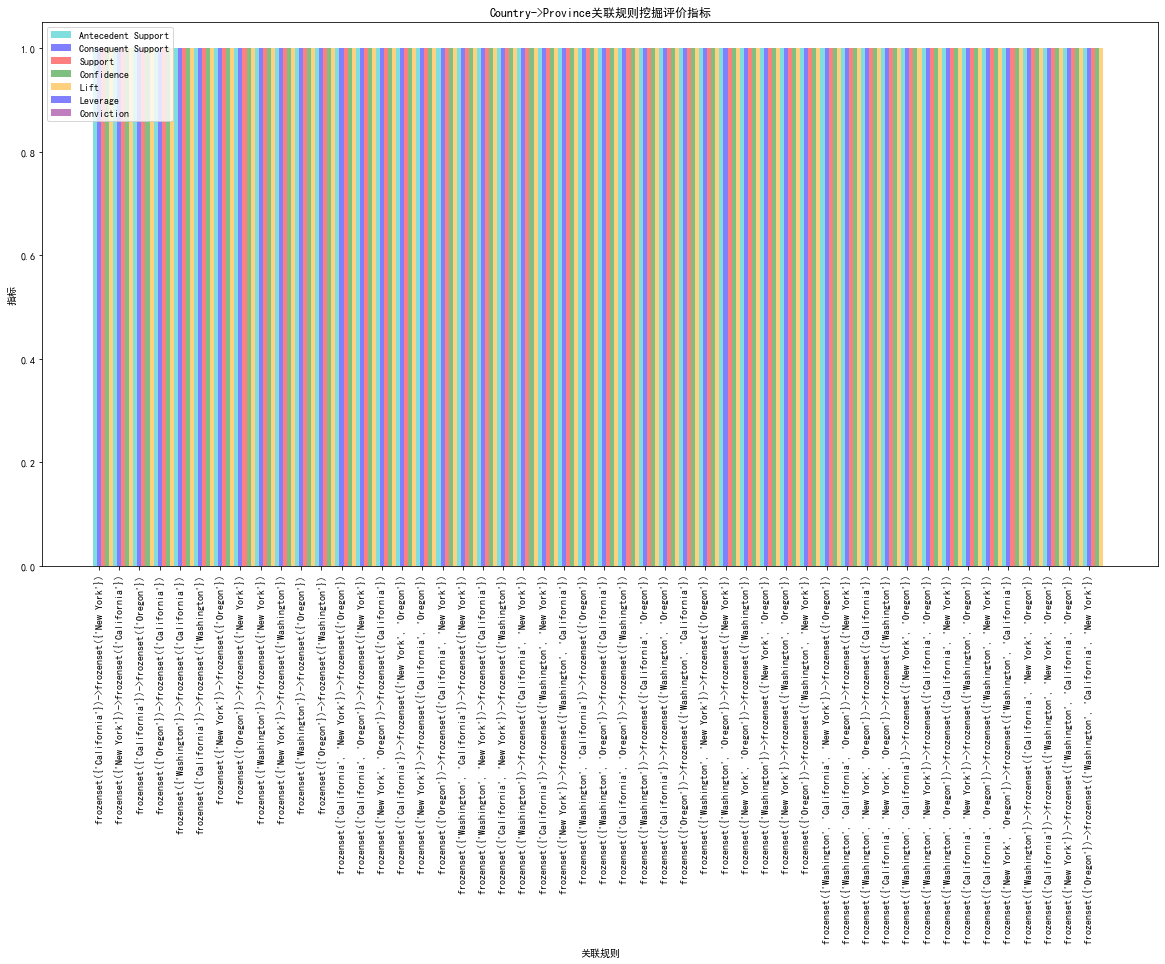

In [24]:
mpl.rcParams["font.sans-serif"] = ["SimHei"]
mpl.rcParams["axes.unicode_minus"] = False

x = np.arange(rules3.shape[0])
y = list(rules3['antecedent support'].values)
y1 =list(rules3['consequent support'].values)
y2 = list(rules3['support'].values)
y3 = list(rules3['confidence'].values)
y4 =list(rules3['lift'].values)
y5 = list(rules3['leverage'].values)
y6 = list(rules3['conviction'].values)

bar_width = 0.2
tick_label = rules3['x']

plt.bar(x, y, bar_width, align="center", color="c", label="Antecedent Support", alpha=0.5)
plt.bar(x+bar_width, y1, bar_width, color="b", align="center", label="Consequent Support", alpha=0.5)
plt.bar(x+bar_width*2, y2, bar_width, color="red", align="center", label="Support", alpha=0.5)
plt.bar(x+bar_width*3, y3, bar_width, color="green", align="center", label="Confidence", alpha=0.5)
plt.bar(x+bar_width*4, y4, bar_width, color="orange", align="center", label="Lift", alpha=0.5)
plt.bar(x+bar_width*5, y5, bar_width, color="blue", align="center", label="Leverage", alpha=0.5)
plt.bar(x+bar_width*6, y6, bar_width, color="purple", align="center", label="Conviction", alpha=0.5)

plt.title('Country->Province关联规则挖掘评价指标')
plt.xlabel("关联规则")
plt.ylabel("指标")

plt.xticks(x+bar_width, tick_label)
plt.xticks(rotation=90)
plt.legend()

plt.show()